In [53]:
import torch
import os
import torchvision.transforms as transforms
from IPython.display import Image, display

In [86]:
# Define the directory containing the .pt files
directory = '/workspace/data/lchu/hls/vis/2023-07-06_02-01-18'

# List all files in the directory
file_list = os.listdir(directory)

In [87]:
# Filter for .pt files
pt_files = [file for file in file_list if file.endswith('.pt')]

# Load tensors from each .pt file
tensors = {}
for file in pt_files:
    file_path = os.path.join(directory, file)
    tensor = torch.load(file_path)
    tensors[file.split('.',1)[0]] = tensor

# Access the loaded tensors
for key, value in tensors.items():
    print(key)
    print(value.shape)

pred_3
torch.Size([8, 4, 3, 224, 224])
pred_1
torch.Size([8, 4, 3, 224, 224])
input_mask_4
torch.Size([8, 4, 3, 224, 224])
input_3
torch.Size([8, 4, 3, 224, 224])
input_mask_0
torch.Size([8, 4, 3, 224, 224])
pred_2
torch.Size([8, 4, 3, 224, 224])
mask_4
torch.Size([8, 4, 3, 224, 224])
pred_0
torch.Size([8, 4, 3, 224, 224])
pred_4
torch.Size([8, 4, 3, 224, 224])
input_4
torch.Size([8, 4, 3, 224, 224])
input_mask_1
torch.Size([8, 4, 3, 224, 224])
input_0
torch.Size([8, 4, 3, 224, 224])
pred_5
torch.Size([8, 4, 3, 224, 224])
mask_3
torch.Size([8, 4, 3, 224, 224])
input_mask_5
torch.Size([8, 4, 3, 224, 224])
mask_0
torch.Size([8, 4, 3, 224, 224])
mask_2
torch.Size([8, 4, 3, 224, 224])
input_5
torch.Size([8, 4, 3, 224, 224])
mask_1
torch.Size([8, 4, 3, 224, 224])
input_1
torch.Size([8, 4, 3, 224, 224])
mask_5
torch.Size([8, 4, 3, 224, 224])
input_2
torch.Size([8, 4, 3, 224, 224])
input_mask_3
torch.Size([8, 4, 3, 224, 224])
input_mask_2
torch.Size([8, 4, 3, 224, 224])


In [88]:
tensor_dict = {name: [tensor[0,0:3,0,:,:].squeeze(0).squeeze(2), tensor[0,0:3,1,:,:].squeeze(0).squeeze(2), tensor[0,0:3,2,:,:].squeeze(0).squeeze(2)] for name, tensor in tensors.items()}

In [89]:
sorted_dict = dict(sorted(tensor_dict.items(), key=lambda x: x[0][-1]))

In [90]:
concat_dict = {name: torch.cat(tensor_list, dim=2) for name, tensor_list in sorted_dict.items()}

input_mask_0


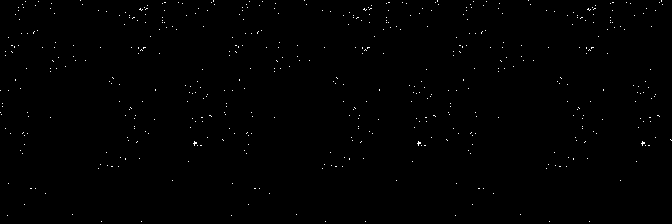

pred_0


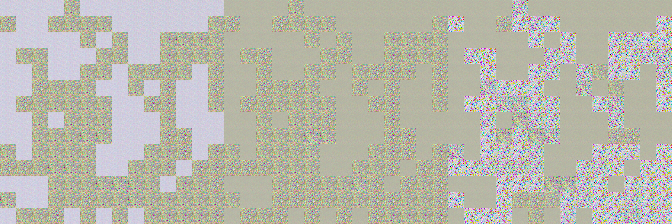

input_0


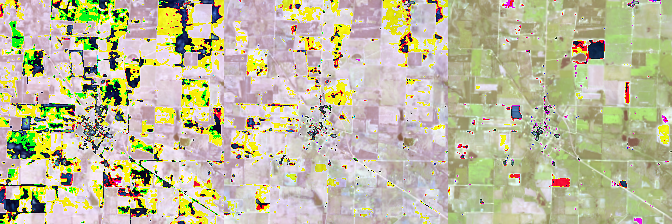

mask_0


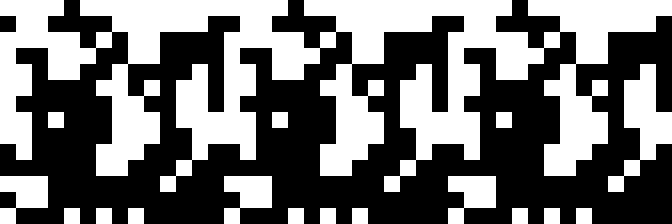

pred_1


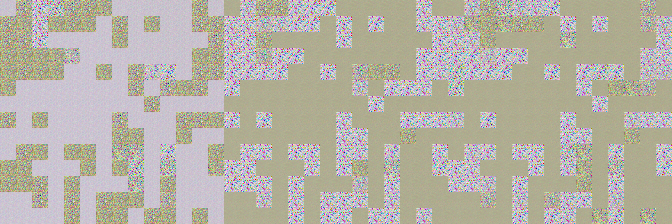

input_mask_1


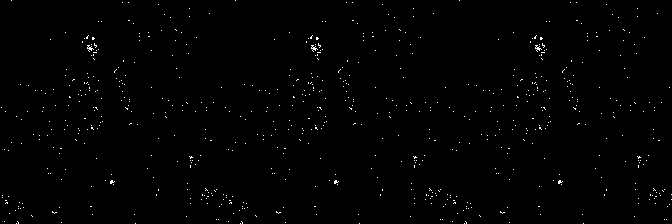

mask_1


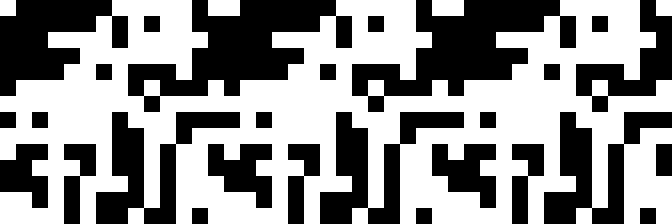

input_1


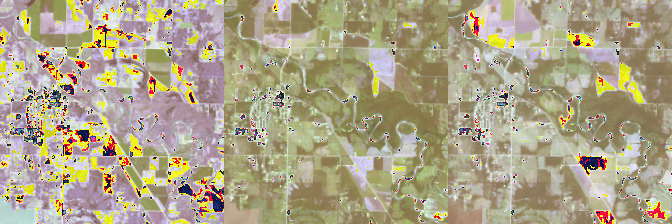

pred_2


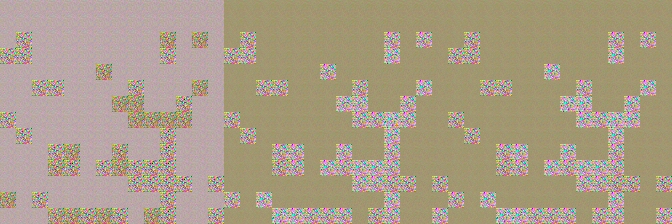

mask_2


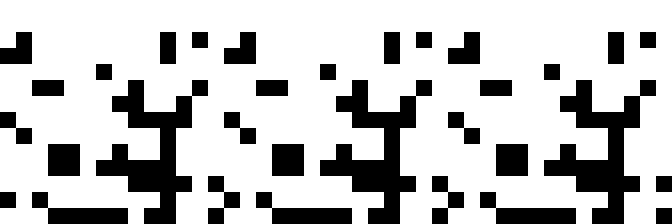

input_2


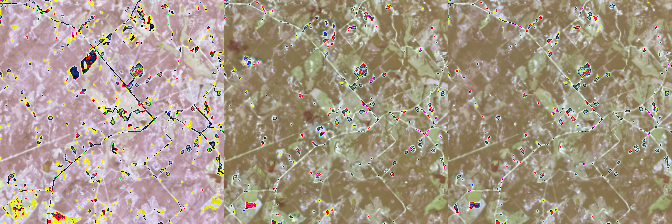

input_mask_2


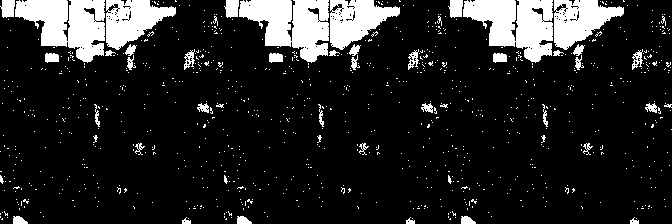

pred_3


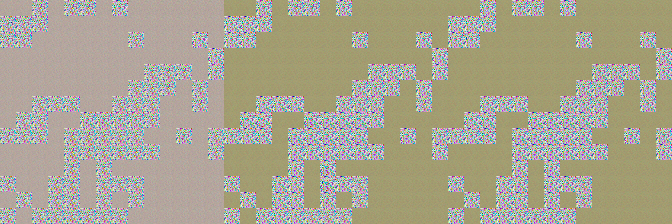

input_3


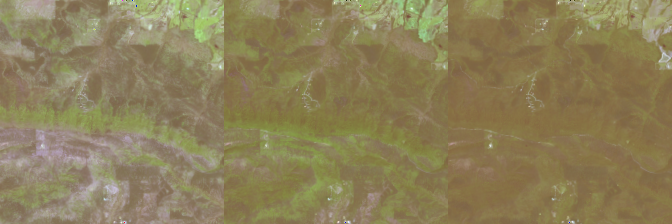

mask_3


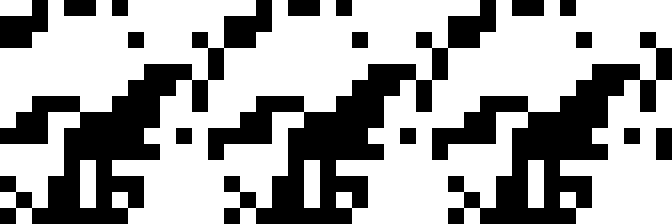

input_mask_3


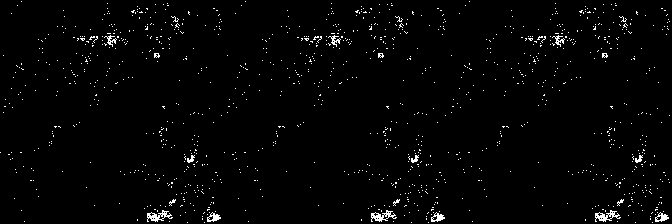

input_mask_4


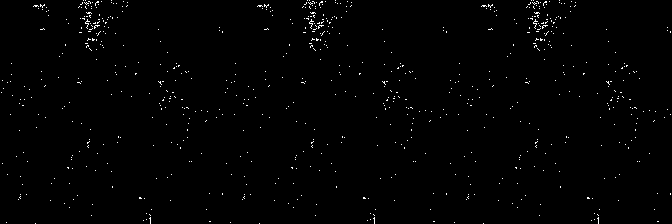

mask_4


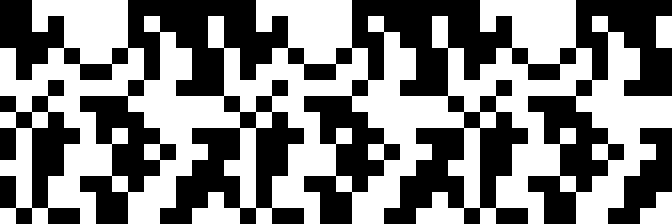

pred_4


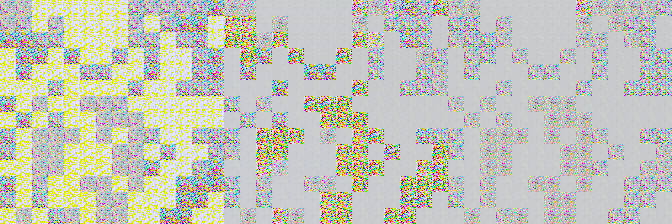

input_4


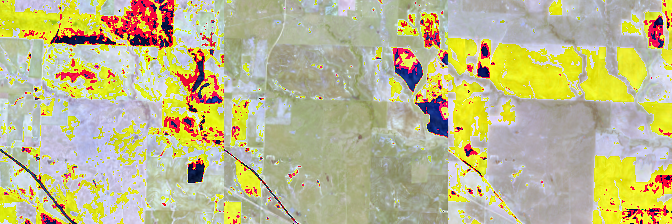

pred_5


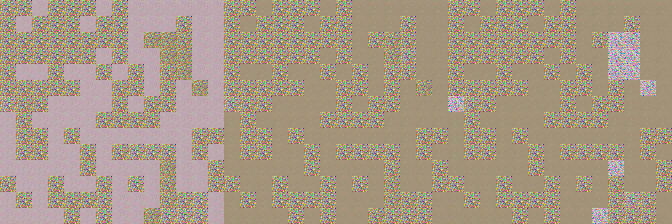

input_mask_5


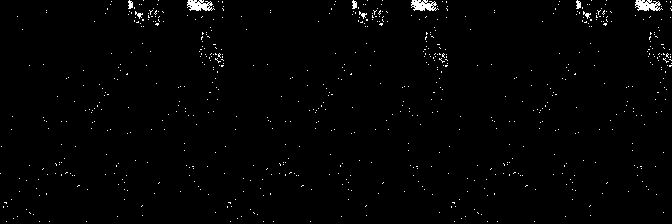

input_5


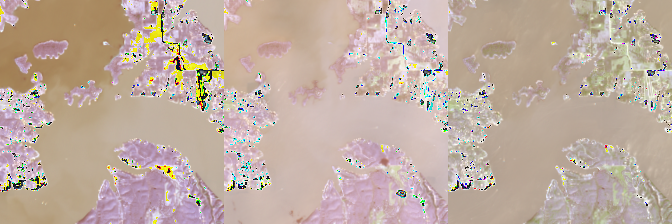

mask_5


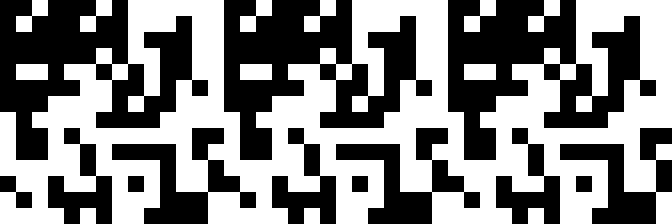

In [91]:

# Convert tensors to PIL Images
to_pil = transforms.ToPILImage()
image_dict = {name: to_pil(tensor) for name, tensor in concat_dict.items()}

# Display each image
for name, image in image_dict.items():
    print(name)
    display(image)